In [ ]:
"""# Para melhor exploração e visualização dos dados
!pip install pygwalker -q

import pygwalker as pyg"""

'# Para melhor exploração e visualização dos dados\n!pip install pygwalker -q\n\nimport pygwalker as pyg'

In [ ]:
# Importando bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Importando a base de dados
df = pd.read_csv ('/content/drive/MyDrive/Planilhas - Ciência de Dados/streaming_data.csv')

# Data Understanding

In [ ]:
# Visualizando os dados iniciais
df.head()

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,User_id
0,49.0,Male,4700.0,3.0,Basic,NaN,3,NaN,0.0,a271aa56-bcfc-4f0a-91f7-b773de6b86a4
1,69.0,Female,6107.0,2.0,Standard,NaN,1,2.14,0.0,fe14b048-770b-4619-8ec6-485b0969ae31
2,44.0,Male,6374.0,3.0,Premium,1.0,1,1.91,1.0,0283dffd-6684-4a05-9c6f-c02098a6849d
3,26.0,Male,NaN,5.0,Basic,NaN,2,NaN,NaN,c316f2f5-3403-4a0a-82c2-c98e4b3379d2
4,18.0,NaN,1948.0,3.0,Basic,NaN,3,3.88,0.0,14879bcb-1977-4ad8-a7f9-6aa9bf7b872f


In [ ]:
# Informações dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77884 entries, 0 to 77883
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     66607 non-null  float64
 1   Gender                  63368 non-null  object 
 2   Time_on_platform        56464 non-null  float64
 3   Devices_connected       52696 non-null  float64
 4   Subscription_type       52663 non-null  object 
 5   Num_streaming_services  9572 non-null   float64
 6   Num_active_profiles     77884 non-null  int64  
 7   Avg_rating              60614 non-null  float64
 8   Churned                 61148 non-null  float64
 9   User_id                 77884 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 5.9+ MB


In [ ]:
# Descrição dos dados
df.describe()

,Age,Time_on_platform,Devices_connected,Num_streaming_services,Num_active_profiles,Avg_rating,Churned
count,66607.000000,56464.000000,52696.000000,9572.000000,77884.000000,60614.000000,61148.000000
mean,43.511072,4385.848505,2.995370,2.496239,3.002273,3.002252,0.243066
std,15.043158,2526.580859,1.414072,1.120700,1.413235,1.154963,0.428938
min,18.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,30.000000,2196.000000,2.000000,1.000000,2.000000,1.990000,0.000000
50%,43.000000,4384.000000,3.000000,2.000000,3.000000,3.010000,0.000000
75%,57.000000,6573.000000,4.000000,4.000000,4.000000,4.000000,0.000000
max,69.000000,8759.000000,5.000000,4.000000,5.000000,5.000000,1.000000


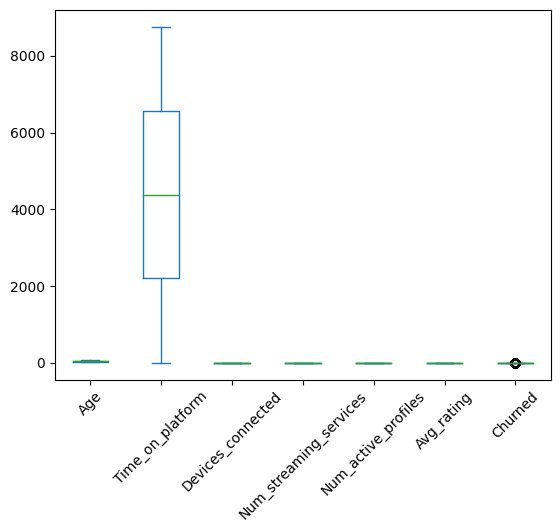

In [ ]:
df.plot.box()
plt.xticks (rotation = 45);

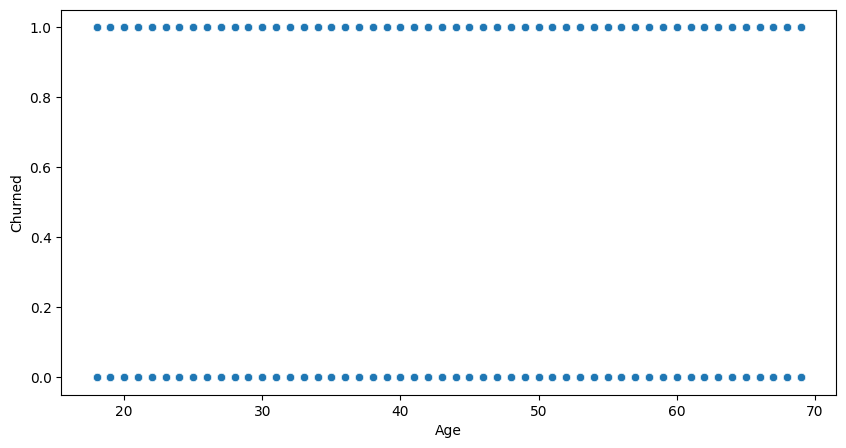

In [ ]:
# Sigmoide
plt.figure (figsize = (10,5))
sns.scatterplot (data = df, x = 'Age', y = 'Churned');

In [ ]:
# Verificando a quantidade de dados nulos
df.isna().sum()

Age                       11277
Gender                    14516
Time_on_platform          21420
Devices_connected         25188
Subscription_type         25221
Num_streaming_services    68312
Num_active_profiles           0
Avg_rating                17270
Churned                   16736
User_id                       0
dtype: int64

# Data Preparation

In [ ]:
# Substituir valores “NaN” por 0, colunas → Time_on_platform, Num_streaming_services, Churned, Avg_rating, Devices_connected
df.fillna({'Time_on_platform': 0, 'Num_streaming_services': 0, 'Churned': 0, 'Avg_rating': 0, 'Devices_connected': 0}, inplace = True)

In [ ]:
# Confirmando a substituição dos nulos nas colunas especificadas
df.isna().sum()

Age                       11277
Gender                    14516
Time_on_platform              0
Devices_connected             0
Subscription_type         25221
Num_streaming_services        0
Num_active_profiles           0
Avg_rating                    0
Churned                       0
User_id                       0
dtype: int64

In [ ]:
# Dropar as linhas nulas nas colunas Gender, Subscription_type e Age
df = df.dropna(subset=['Age', 'Subscription_type', 'Gender'])

In [ ]:
# Contagem de valores de Churned
df.Churned.value_counts()

Churned
0.0    29459
1.0     7056
Name: count, dtype: int64

In [ ]:
# Transformando os valores de Churned por No e Yes
df.replace ({'Churned':{1.0: 'YES', 0.0: 'NO'}})

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,User_id
0,49.0,Male,4700.0,3.0,Basic,0.0,3,0.00,NO,a271aa56-bcfc-4f0a-91f7-b773de6b86a4
1,69.0,Female,6107.0,2.0,Standard,0.0,1,2.14,NO,fe14b048-770b-4619-8ec6-485b0969ae31
2,44.0,Male,6374.0,3.0,Premium,1.0,1,1.91,YES,0283dffd-6684-4a05-9c6f-c02098a6849d
3,26.0,Male,0.0,5.0,Basic,0.0,2,0.00,NO,c316f2f5-3403-4a0a-82c2-c98e4b3379d2
5,54.0,Male,3024.0,2.0,Basic,0.0,1,0.00,NO,a1df3a13-9255-4d00-8a9d-20565fefaab9
...,...,...,...,...,...,...,...,...,...,...
77879,45.0,Male,0.0,0.0,Basic,0.0,5,2.20,NO,6b51fe0d-d4a1-41ed-a55c-d05f5c961e3c
77880,47.0,Female,6176.0,0.0,Premium,0.0,2,4.54,NO,59d70167-6be0-474c-b71e-14153205b44f
77881,64.0,Female,0.0,5.0,Premium,0.0,1,4.34,YES,a7d5ed26-78a4-4e70-bd04-0fec883e56aa
77882,58.0,Male,1314.0,5.0,Standard,0.0,4,0.00,NO,472e9e70-87ca-4c5e-bfee-fa9f42b54f51


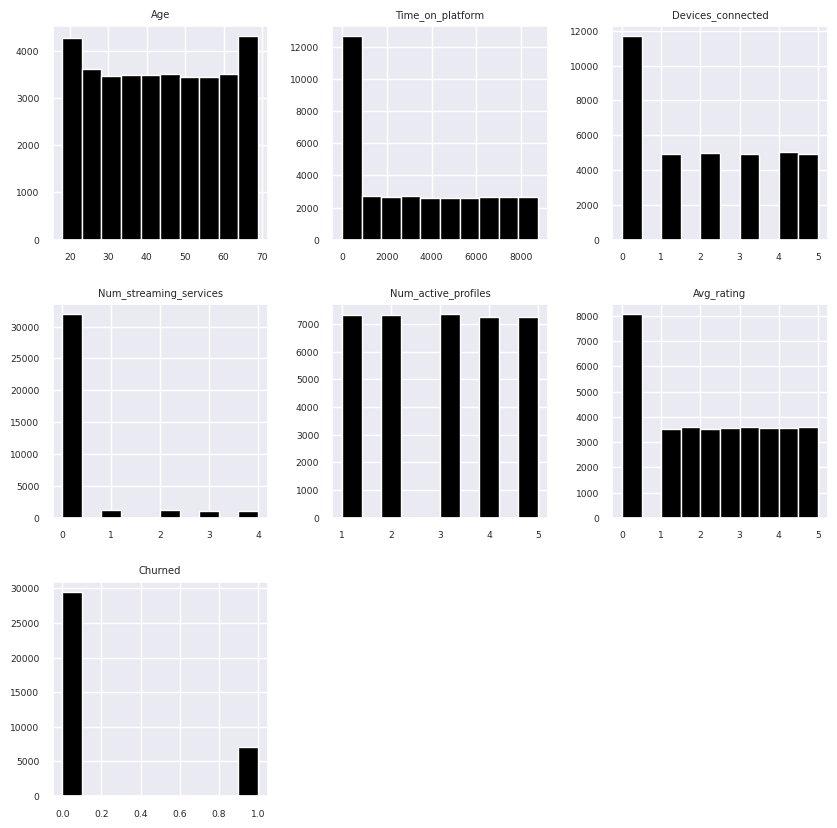

In [ ]:
# Obs: Churn x Não-Churn estão bem desproporcionais
sns.set (font_scale = 0.6, rc = {'figure.figsize': (10, 10)})

eixo = df.hist (bins = 10, color = 'black')

In [ ]:
# Verificando a contagem de valores de Churned
df.Churned.value_counts()

Churned
0.0    29459
1.0     7056
Name: count, dtype: int64

In [ ]:
# Transformar os valores floats em inteiros
df = df.astype ({'Avg_rating': 'int'})

# Modelagem de Dados

In [ ]:
# LabelEncoder para transformar dados categóricos em numéricos
le = LabelEncoder()

le.fit(df.Gender)
df.Gender = le.transform(df.Gender)

le.fit(df.Subscription_type)
df.Subscription_type = le.transform(df.Subscription_type)

le.fit(df.User_id)
df.User_id = le.transform(df.User_id)

In [ ]:
# Definir variáveis X e y
X = df [['Age', 'Gender', 'Time_on_platform', 'Devices_connected', 'Subscription_type', 'Num_streaming_services', 'Num_active_profiles', 'Avg_rating', 'User_id']]
y = df ['Churned']

In [ ]:
# Aplicando o MinMaxScaler para normalizar e padronizar
scaler = MinMaxScaler()

df = scaler.fit_transform(df[['Age', 'Time_on_platform', 'Devices_connected', 'Num_streaming_services', 'Num_active_profiles', 'Avg_rating']])

In [ ]:
# Separando em treino e teste
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.3, random_state = 2024)

In [ ]:
# Analisando o shape da divisão
print ("Tamanho de X_train:", X_train.shape)

print ("Tamanho de X_test:", X_test.shape)

print ("Tamanho de y_train:", y_train.shape)

print ("Tamanho de y_test:", y_test.shape)

Tamanho de X_train: (25560, 9)
Tamanho de X_test: (10955, 9)
Tamanho de y_train: (25560,)
Tamanho de y_test: (10955,)


In [ ]:
df_logreg = LogisticRegression ()

In [ ]:
# Realizando o .fit (Treinar o treino)
df_logreg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
df_logreg

LogisticRegression()

In [ ]:
df_logreg.score(X_train, y_train)

0.8087636932707355

In [ ]:
y_predictions = df_logreg.predict (X_test)

In [ ]:
print (accuracy_score (y_test, y_predictions)*100)

80.20994979461433


In [ ]:
# Comparando com o y_test para ver se o modelo está acertando
y_test

13782    0.0
12244    0.0
48447    1.0
47581    0.0
63910    0.0
        ... 
51521    0.0
65999    0.0
8596     0.0
5947     0.0
18942    1.0
Name: Churned, Length: 10955, dtype: float64

In [ ]:
# Matriz de confusão
confusion_matrix (y_test, y_predictions)

array([[8787,    0],
       [2168,    0]])

In [ ]:
# Relatório de classificação
print (classification_report (y_test, y_predictions))

              precision    recall  f1-score   support

         0.0       0.80      1.00      0.89      8787
         1.0       0.00      0.00      0.00      2168

    accuracy                           0.80     10955
   macro avg       0.40      0.50      0.45     10955
weighted avg       0.64      0.80      0.71     10955



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Random Forest - Modelagem de Dados

In [ ]:
# Configurando os hiperparâmetros
# Números de árvores no RandomForest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]

# Números de features a cada split
max_features = ['sqrt']

# Número máximo de níveis na árvore
max_depth = [2,4]

# Número mínimo de amostras requeridas para a dividir um nó
min_samples_split = [2, 5]

# Número mínimo de amostras requeridas em cada leaf node
min_samples_leaf = [1, 2]

# Método de selecionar amostras para treino de cada árvore
bootstrap = [True, False]

In [ ]:
# Criação do param_grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print (param_grid)

{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_features': ['sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [ ]:
# Tunning do modelo
clf = RandomForestClassifier()

grid_search = GridSearchCV (estimator = clf, param_grid = param_grid)

In [ ]:
# Realizando o fit
# Aqui vai mostrar quais hiperparâmetros utilizar
grid_search.fit (X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['sqrt'], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]})

In [ ]:
# Notebook do kaggle para ajudar
# https://www.kaggle.com/code/funxexcel/p2-random-forest-tuning-gridsearchcv/notebook

In [ ]:
# Aqui vai mostrar quais são os melhores parâmetros de acordo com o GridSearch
melhores_param = grid_search.best_params_

print (melhores_param)

{'bootstrap': False, 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 17}


In [ ]:
print (f'Treinar Acurácia - : {grid_search.score(X_train,y_train):.3f}')
print (f'Testar Acurácia - : {grid_search.score(X_test,y_test):.3f}')

Treinar Acurácia - : 0.809
Testar Acurácia - : 0.802


In [ ]:
melhores_result = grid_search.best_score_

print (melhores_result)

0.8088419405320814
